In [1]:
import matplotlib.pyplot as plt
from gofish import imagecube
import numpy as np

In [2]:
cube = imagecube('Sz129_fits/Sz129_map_multiscale_05_tresholdcorregido_final', FOV=1)

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


Text(0, 0.5, 'Peak Intensity (Jy/beam)')

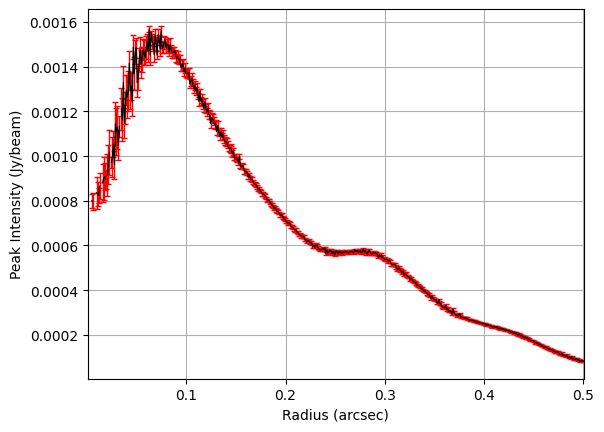

In [3]:
x, y, dy = cube.radial_profile(inc=34, PA=151,dr=0.001)

# Plot
fig, ax = plt.subplots()
ax.errorbar(x, y, dy, fmt=' ', capsize=2, capthick=1, color='r', lw=1.0)
ax.plot(x, y, color='k', lw=0.9)  # Sin el parámetro 'where'
ax.set_xlim(x.min(), x.max())
ax.set_xlabel('Radius (arcsec)')
ax.grid(True)
ax.set_ylabel('Peak Intensity (Jy/beam)')

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


Text(0, 0.5, 'Peak Intensity (Jy/beam)')

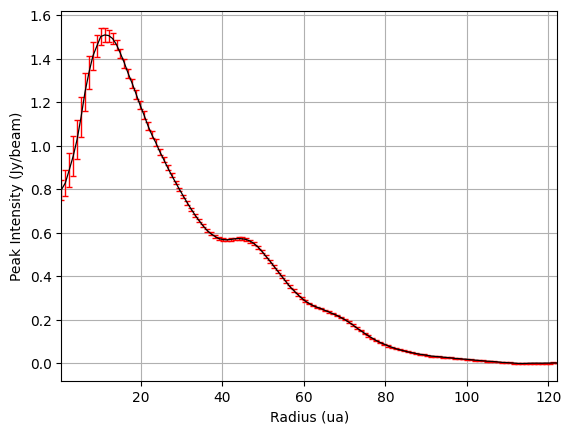

In [4]:
# Suponiendo que conoces la distancia en parsecs
distancia_pc = 161  # Ejemplo para Sz 129, ajusta este valor

cube_1 = imagecube('Sz129_fits/Sz129_map_multiscale_05_tresholdcorregido_final', FOV=3)
x_1, y_1, dy_1 = cube_1.radial_profile(inc=34, PA=151, dr=0.006)

# Convertir x de arcsec a UA
x_ua = x_1 * distancia_pc
y_mjy = 1000 * y_1
dy_mjy = 1000*dy_1
# Plot con eje x en UA
fig, ax = plt.subplots()
ax.errorbar(x_ua, y_mjy, dy_mjy, fmt=' ', capsize=2, capthick=1, color='r', lw=1.0)
ax.plot(x_ua, y_mjy, color='k', lw=0.9)
ax.set_xlim(x_ua.min(), x_ua.max())
ax.set_xlabel('Radius (ua)')  # Cambiar etiqueta
ax.grid(True)
ax.set_ylabel('Peak Intensity (Jy/beam)')

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


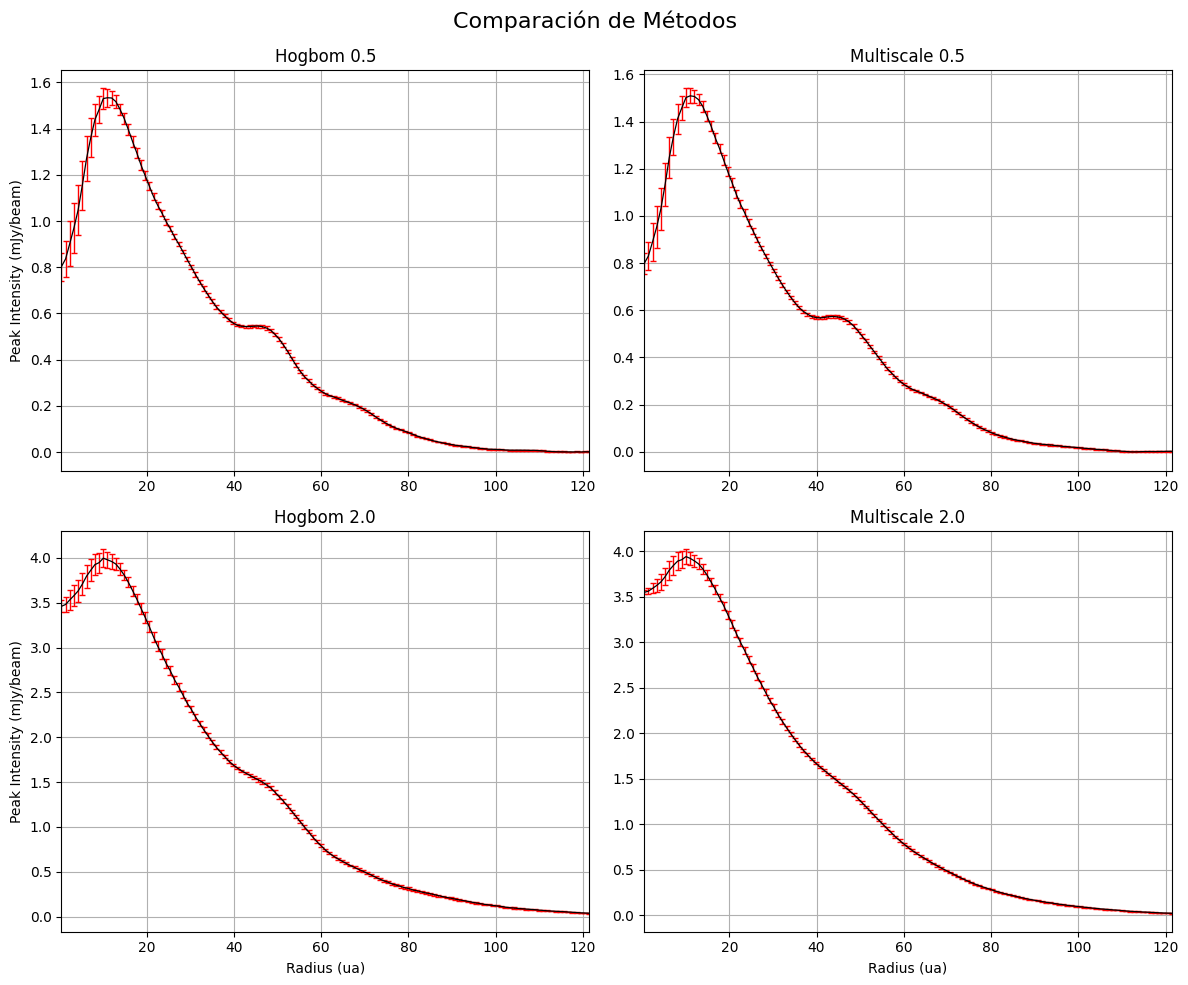

In [5]:
import matplotlib.pyplot as plt

archivos = {
    'Hogbom 0.5': 'Sz129_fits/Sz129_map_hogbom_05_tresholdcorregido',
    'Hogbom 2.0': 'Sz129_fits/Sz129_map_hogbom_2_tresholdcorregido',
    'Multiscale 0.5': 'Sz129_fits/Sz129_map_multiscale_05_tresholdcorregido_final',
    'Multiscale 2.0': 'Sz129_fits/Sz129_map_multiscale_robust2_aumento_threshold.fits'
}

distancia_pc = 160  

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comparación de Métodos', fontsize=16)

for i, (nombre, archivo) in enumerate(archivos.items()):
    if 'Hogbom' in nombre:
        col = 0
    else:
        col = 1
        
    if '0.5' in nombre:
        fila = 0
    else:
        fila = 1
    
    cube = imagecube(archivo, FOV=3)
    x, y, dy = cube.radial_profile(inc=34, PA=151, dr=0.006)
    x_ua = x * distancia_pc
    y_mjy = 1000 * y
    dy_mjy = 1000 * dy
    ax = axes[fila, col]
    ax.errorbar(x_ua, y_mjy, dy_mjy, fmt=' ', capsize=2, capthick=1, color='r', lw=1.0)
    ax.plot(x_ua, y_mjy, color='k', lw=0.9)
    ax.set_xlim(x_ua.min(), x_ua.max())
    ax.grid(True)
    if fila == 1:
        ax.set_xlabel('Radius (ua)')
    if col == 0:
        ax.set_ylabel('Peak Intensity (mJy/beam)')
    ax.set_title(nombre)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Espacio para el título principal
plt.savefig("Comparacion de metodos")
plt.show()

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


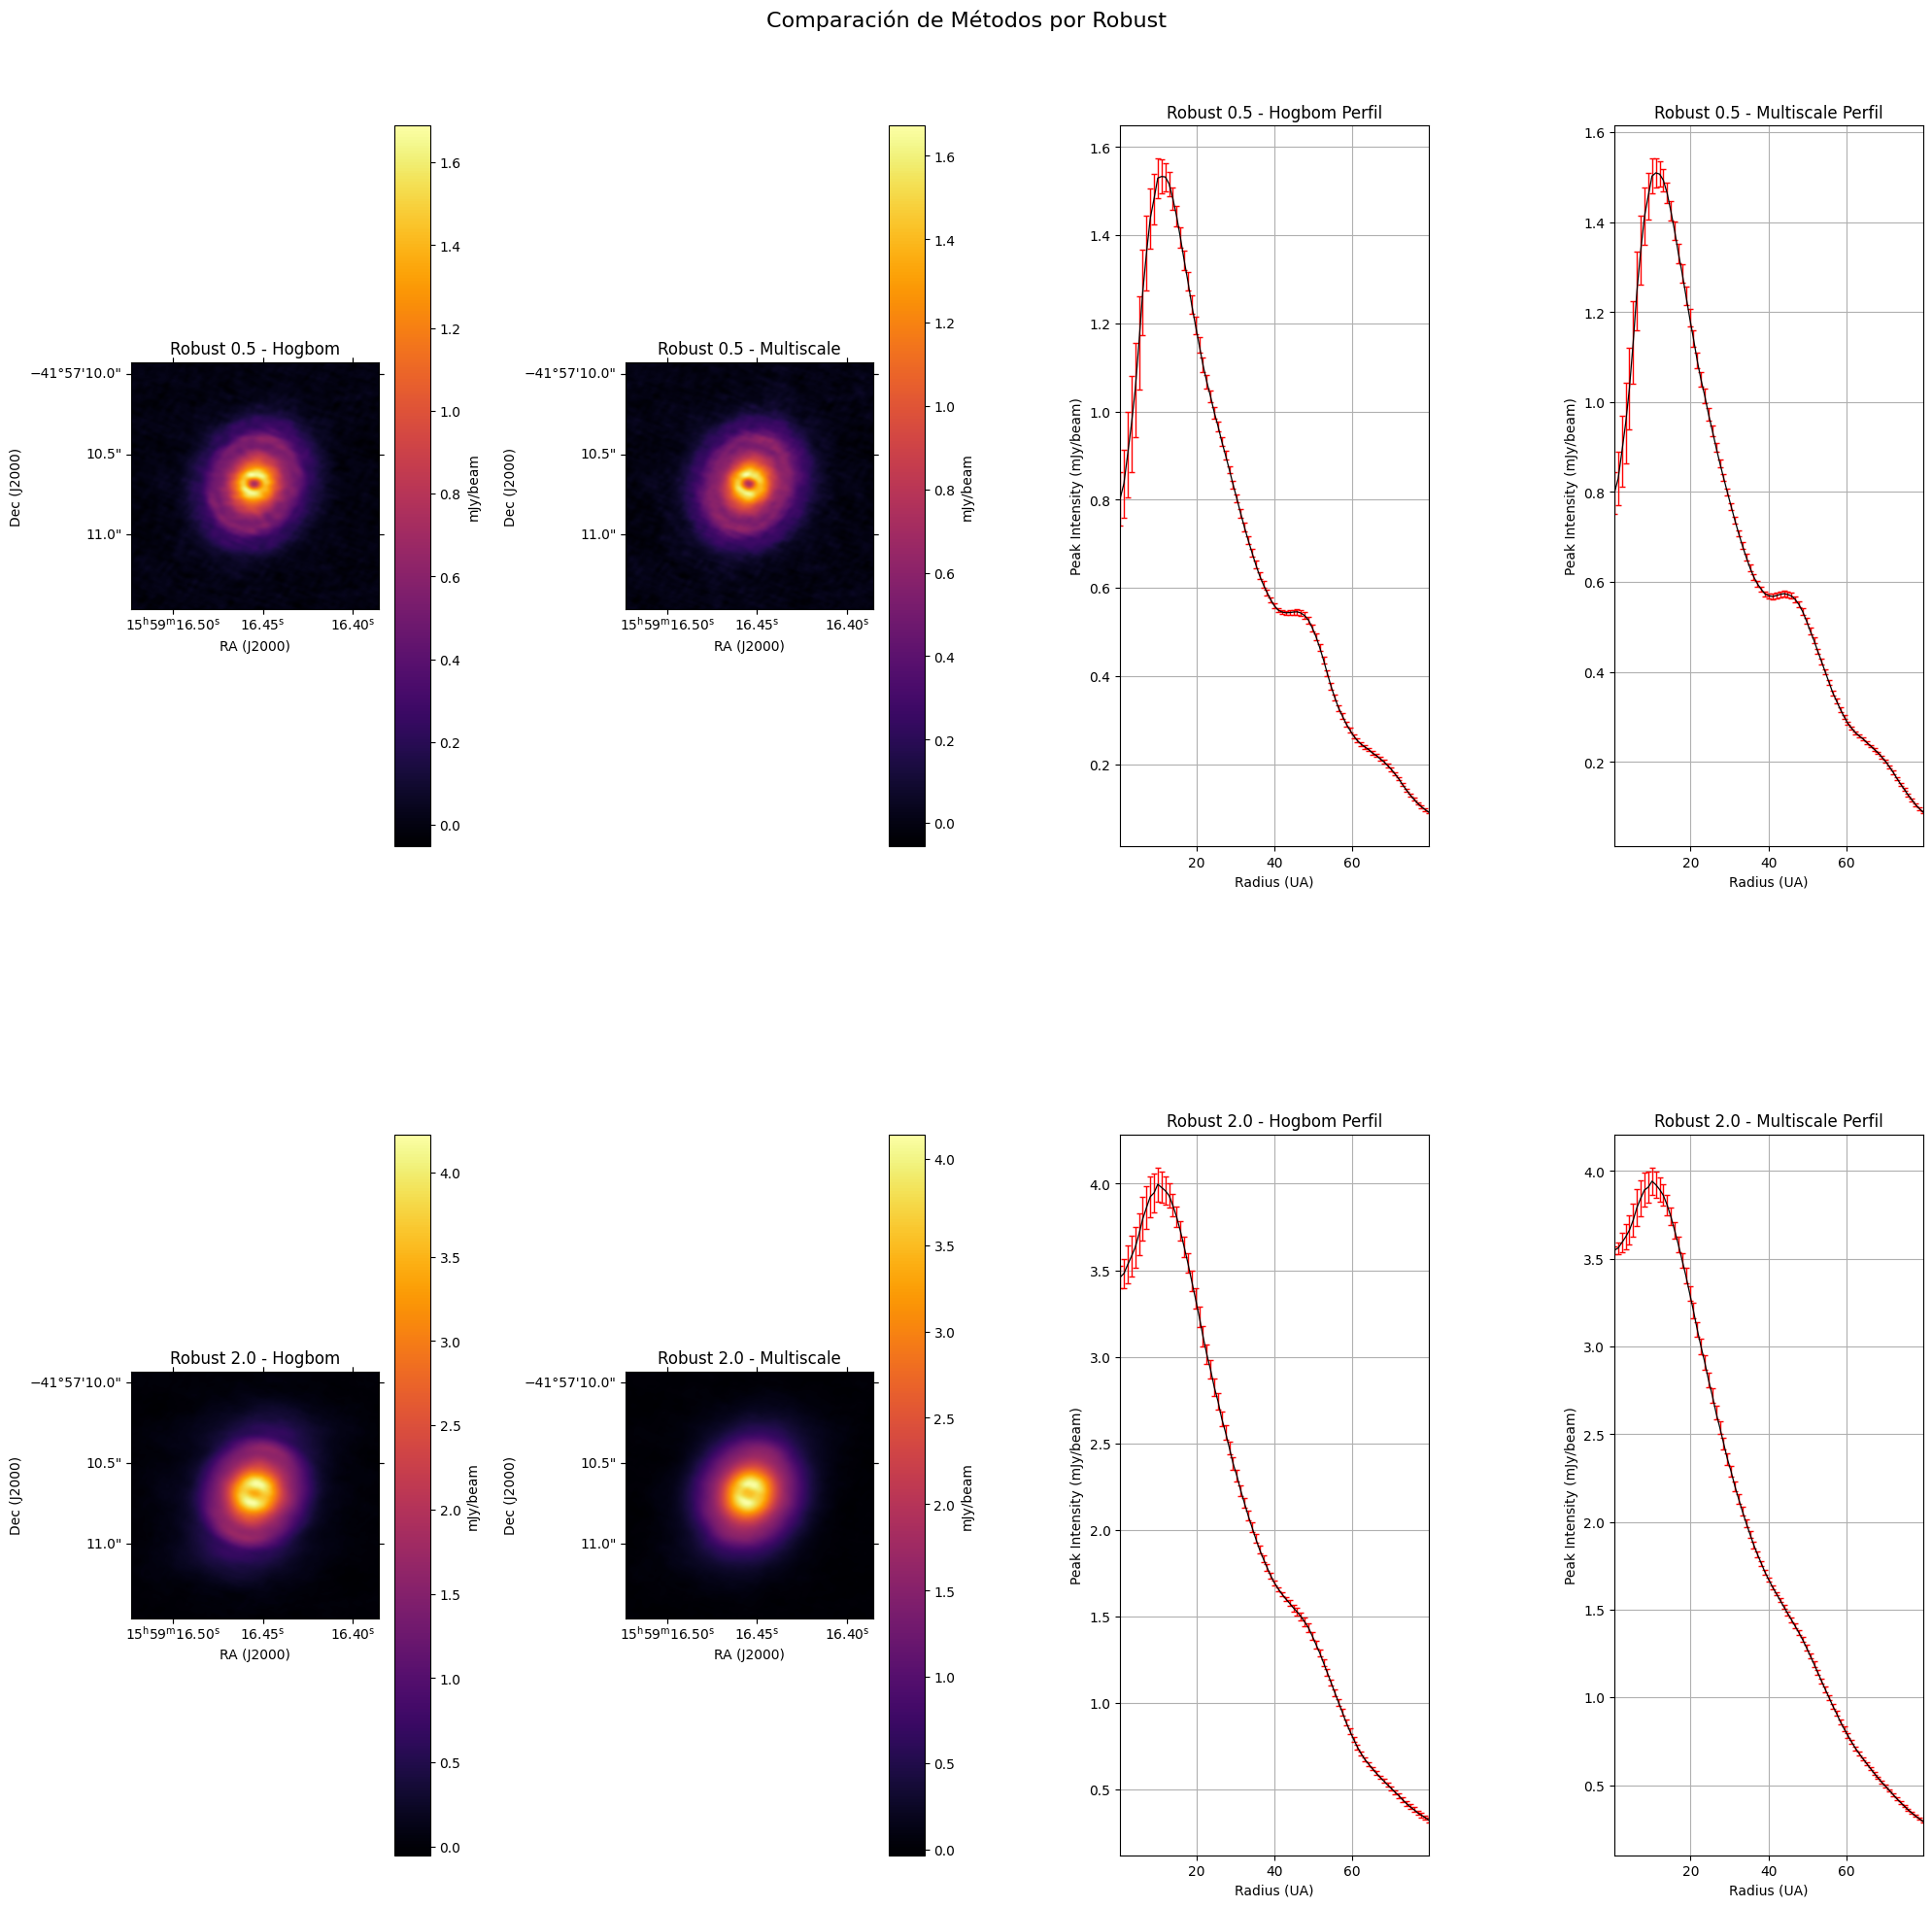

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np


distancia_pc = 161 
archivos_robust_05 = [
    "Sz129_fits/Sz129_map_hogbom_05_tresholdcorregido",
    "Sz129_fits/Sz129_map_multiscale_05_tresholdcorregido_final"
]

archivos_robust_20 = [
    "Sz129_fits/Sz129_map_hogbom_2_tresholdcorregido",
    "Sz129_fits/Sz129_map_multiscale_robust2_aumento_threshold.fits"
]

nombres_metodos = ['Hogbom', 'Multiscale']

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('Comparación de Métodos por Robust', fontsize=16)

for j, archivo in enumerate(archivos_robust_05):
    # ==============================================
    # COLUMNAS 0-1: IMAGEN (primeras dos columnas)
    # ==============================================
    ax_imagen = axes[0, j]
    hdul = fits.open(archivo)
    data = hdul[0].data
    header = hdul[0].header
    
  
    if data.ndim == 4:
        img = data[0, 0, :, :]
    else:
        img = data
    img_mJy = img * 1000.0
    wcs = WCS(header)
  
    ax_imagen.remove() 
    ax_imagen = fig.add_subplot(2, 4, j + 1, projection=wcs.celestial)
    im = ax_imagen.imshow(img_mJy, origin="lower", cmap="inferno")
    cbar = plt.colorbar(im, ax=ax_imagen)
    cbar.set_label("mJy/beam", fontsize=10)
    ax_imagen.set_xlabel("RA (J2000)", fontsize=10)
    ax_imagen.set_ylabel("Dec (J2000)", fontsize=10)
    ax_imagen.set_title(f"Robust 0.5 - {nombres_metodos[j]}", fontsize=12)
    
    # ==============================================
    # COLUMNAS 2-3: PERFIL RADIAL (últimas dos columnas)
    # ==============================================
    ax_perfil = axes[0, j + 2]
    cube = imagecube(archivo, FOV=1)
    x, y, dy = cube.radial_profile(inc=34, PA=151, dr=0.006)
    x_ua = x * distancia_pc
    y_mjy = 1000 * y
    dy_mjy = 1000 * dy
    ax_perfil.errorbar(x_ua, y_mjy, dy_mjy, fmt=' ', capsize=2, 
                      capthick=1, color='r', lw=1.0)
    ax_perfil.plot(x_ua, y_mjy, color='k', lw=0.9)
    ax_perfil.set_xlim(x_ua.min(), x_ua.max())
    ax_perfil.grid(True)
    ax_perfil.set_xlabel('Radius (UA)', fontsize=10)
    ax_perfil.set_ylabel('Peak Intensity (mJy/beam)', fontsize=10)
    ax_perfil.set_title(f"Robust 0.5 - {nombres_metodos[j]} Perfil", fontsize=12)


for j, archivo in enumerate(archivos_robust_20):
    # ==============================================
    # COLUMNAS 0-1: IMAGEN
    # ==============================================
    ax_imagen = axes[1, j]
    hdul = fits.open(archivo)
    data = hdul[0].data
    header = hdul[0].header
    
    if data.ndim == 4:
        img = data[0, 0, :, :]
    else:
        img = data
    
    img_mJy = img * 1000.0
    wcs = WCS(header)
    ax_imagen.remove() 
    ax_imagen = fig.add_subplot(2, 4, 4 + j + 1, projection=wcs.celestial)  # 4 + porque es segunda fila

    im = ax_imagen.imshow(img_mJy, origin="lower", cmap="inferno")
    cbar = plt.colorbar(im, ax=ax_imagen)
    cbar.set_label("mJy/beam", fontsize=10)
    ax_imagen.set_xlabel("RA (J2000)", fontsize=10)
    ax_imagen.set_ylabel("Dec (J2000)", fontsize=10)
    ax_imagen.set_title(f"Robust 2.0 - {nombres_metodos[j]}", fontsize=12)
    
    # ==============================================
    # COLUMNAS 2-3: PERFIL RADIAL
    # ==============================================
    ax_perfil = axes[1, j + 2]
    cube = imagecube(archivo, FOV=1)
    x, y, dy = cube.radial_profile(inc=34, PA=151, dr=0.006)
    x_ua = x * distancia_pc
    y_mjy = 1000 * y
    dy_mjy = 1000 * dy
    
    ax_perfil.errorbar(x_ua, y_mjy, dy_mjy, fmt=' ', capsize=2, 
                      capthick=1, color='r', lw=1.0)
    ax_perfil.plot(x_ua, y_mjy, color='k', lw=0.9)
    ax_perfil.set_xlim(x_ua.min(), x_ua.max())
    ax_perfil.grid(True)
    ax_perfil.set_xlabel('Radius (UA)', fontsize=10)
    ax_perfil.set_ylabel('Peak Intensity (mJy/beam)', fontsize=10)
    ax_perfil.set_title(f"Robust 2.0 - {nombres_metodos[j]} Perfil", fontsize=12)


plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.6)
plt.savefig("comparacion_robust_2x4.png", dpi=300, bbox_inches='tight')

plt.show()

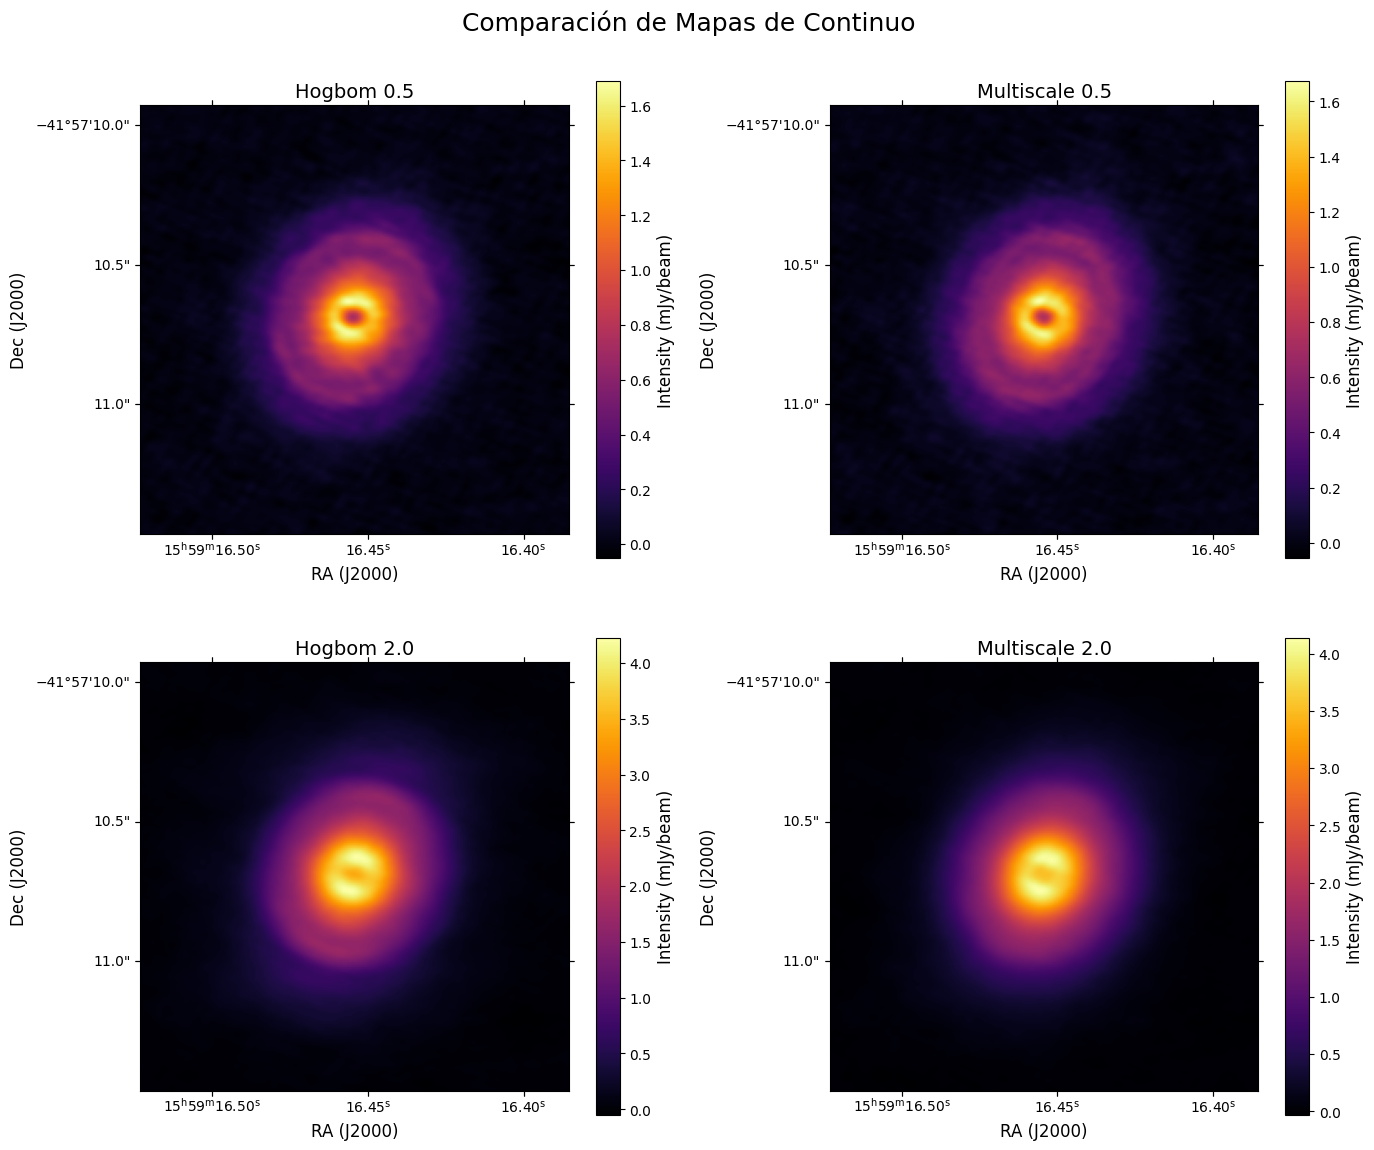

In [7]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib as mpl

mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

archivos = [
    # Fila 0: Robust 0.5
    [
        'Sz129_fits/Sz129_map_hogbom_05_tresholdcorregido',  # Col 0: Hogbom
        'Sz129_fits/Sz129_map_multiscale_05_tresholdcorregido_final'  # Col 1: Multiscale
    ],
    # Fila 1: Robust 2.0  
    [
        'Sz129_fits/Sz129_map_hogbom_2_tresholdcorregido',   # Col 0: Hogbom
        'Sz129_fits/Sz129_map_multiscale_robust2_aumento_threshold.fits'  # Col 1: Multiscale
    ]
]

nombres = [
    ['Hogbom 0.5', 'Multiscale 0.5'],
    ['Hogbom 2.0', 'Multiscale 2.0']
]


fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Comparación de Mapas de Continuo', fontsize=18)

for fila in range(2):
    for col in range(2):
        archivo = archivos[fila][col]
        nombre = nombres[fila][col]
        hdul = fits.open(archivo)
        data = hdul[0].data
        header = hdul[0].header
        
        if data.ndim == 4:
            img = data[0, 0, :, :]
        else:
            img = data
        
        img_mJy = img * 1000.0
        wcs = WCS(header)
        ax = axes[fila, col]
        ax.remove() 
        posicion = fila * 2 + col + 1
        ax = fig.add_subplot(2, 2, posicion, projection=wcs.celestial)
        
        im = ax.imshow(img_mJy, origin="lower", cmap="inferno")
        cbar = plt.colorbar(im, ax=ax)
        cbar.set_label("Intensity (mJy/beam)", fontsize=12)
        cbar.ax.tick_params(labelsize=10)
        ax.set_xlabel("RA (J2000)", fontsize=12)
        ax.set_ylabel("Dec (J2000)", fontsize=12)
        ax.set_title(nombre, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("Comparacion_metodos_imagenes.png", dpi=300, bbox_inches='tight')
plt.show()

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


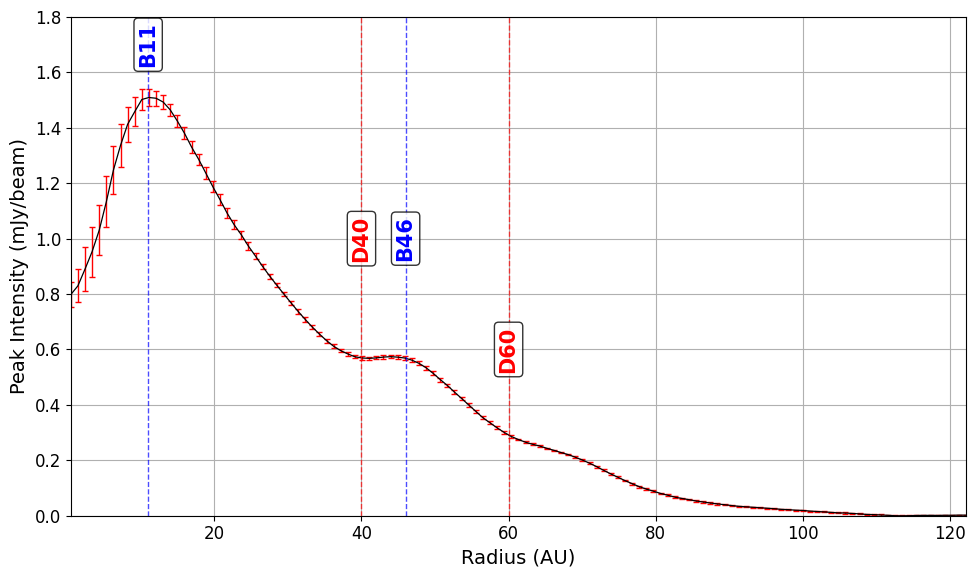

In [8]:
distancia_pc = 161  

cube_1 = imagecube('Sz129_fits/Sz129_map_multiscale_05_tresholdcorregido_final', FOV=3)
x_1, y_1, dy_1 = cube_1.radial_profile(inc=34, PA=151, dr=0.006)

x_ua = x_1 * distancia_pc
y_mjy = 1000 * y_1
dy_mjy = 1000 * dy_1

fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(x_ua, y_mjy, dy_mjy, fmt=' ', capsize=2, capthick=1, color='r', lw=1.0)
ax.plot(x_ua, y_mjy, color='k', lw=0.9)
ax.set_xlim(x_ua.min(), x_ua.max())
ax.set_ylim(0, 1.8)
ax.set_xlabel('Radius (AU)')
ax.grid(True)
ax.set_ylabel('Peak Intensity (mJy/beam)')
estructuras = [
    (11, 'B11', 'bright', 1.7),  # Primer anillo en y=1.7
    (40, 'D40', 'gap', 1.0),     # Brecha en y=1.0
    (46, 'B46', 'bright', 1.0),  # Segundo anillo en y=1.0
    (60, 'D60', 'gap', 0.6)      # Segunda brecha en y=0.6
]

colors = {'bright': 'blue', 'gap': 'red'}

for pos_x, label, tipo, pos_y in estructuras:
    ax.axvline(x=pos_x, color=colors[tipo], linestyle='--', alpha=0.7, linewidth=1)
    ax.text(pos_x, pos_y, label,
            horizontalalignment='center',
            verticalalignment='center',  
            color=colors[tipo],
            weight='bold',
            fontsize=15,
            rotation=90,
            bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))  

plt.tight_layout()
plt.savefig("Perfil_radial_con_labels")
plt.show()